In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import urllib
import imageio
import skimage

In [2]:
def resize2SquareKeepingAspectRation(img, size, interpolation):
    h, w = img.shape[:2]
    c = None if len(img.shape) < 3 else img.shape[2]
    if h == w: 
        return cv2.resize(img, (size, size), interpolation)
    if h > w: 
        dif = h
    else:
        dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)

In [3]:
def url_to_image(url):
    # download the image, convert it to a NumPy array, and then read it into OpenCV format
    req = urllib.request.Request(url, headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    })
    req = urllib.request.urlopen(req)
    image = np.asarray(bytearray(req.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
# CATS:
CATS_LINKS = ["https://memepedia.ru/wp-content/uploads/2019/06/ozadachennyy-kot-sidit-za-stolom-6.jpg",
              "https://www.aspca.org/sites/default/files/cat-care_cat-grooming_eye-care_body5-right.jpg",
              "https://dbw4iivs1kce3.cloudfront.net/680x390/2018/04/Can-I-bathe-my-cat-2018.jpg",
              "https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/features/when_your_dog_or_cat_has_an_allergy_features/650x350_when_your_dog_or_cat_has_an_allergy_features.jpg",
              "https://cdn1-www.cattime.com/assets/uploads/gallery/ragdoll/ragdoll-cats-kittens-1.jpg"
             ]

In [5]:
orig_image = url_to_image(CATS_LINKS[0])
orig_image.shape

(366, 500, 3)

In [6]:
resized_image = resize2SquareKeepingAspectRation(orig_image, 300, cv2.INTER_AREA)
resized_image.shape

(300, 300, 3)

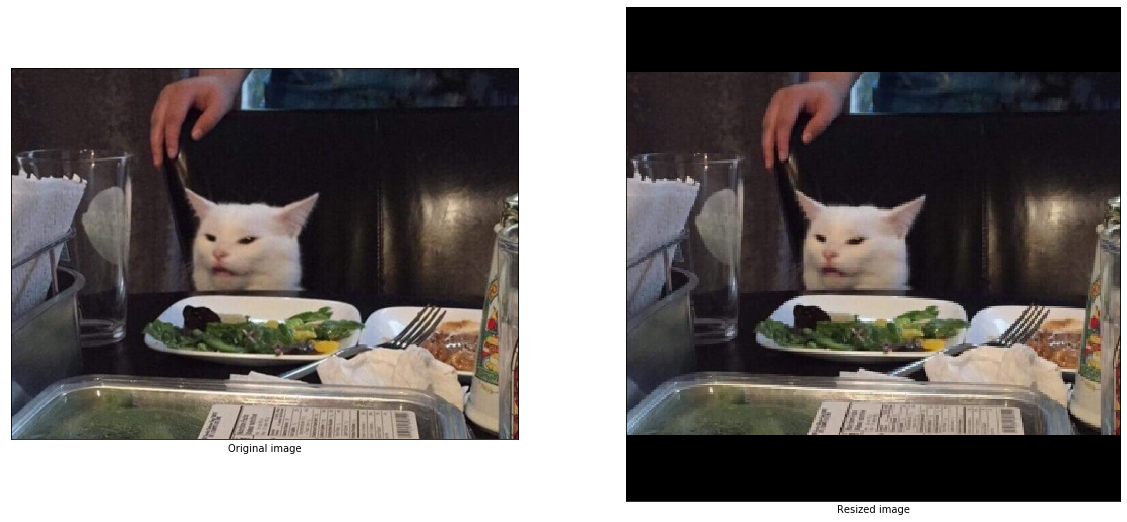

In [7]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(orig_image, cmap=plt.cm.binary)
plt.xlabel("Original image")

plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(resized_image, cmap=plt.cm.binary)
plt.xlabel("Resized image")

plt.show()

In [8]:
rgb_image = orig_image
hsv_image = skimage.color.rgb2hsv(rgb_image)

/home/bocharick/anaconda3_for_saman/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


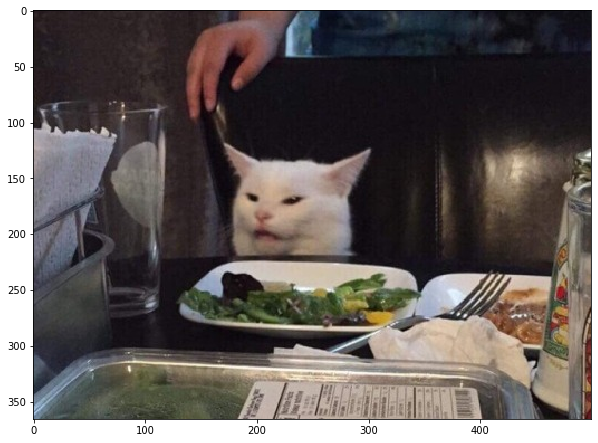

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)

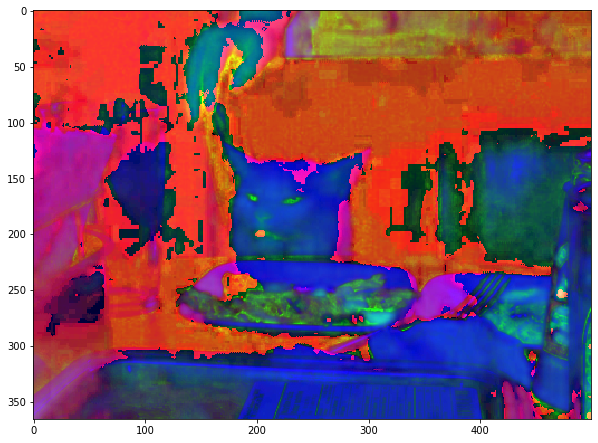

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(hsv_image)

In [11]:
hsv_image[:,:,0] /= 3.33

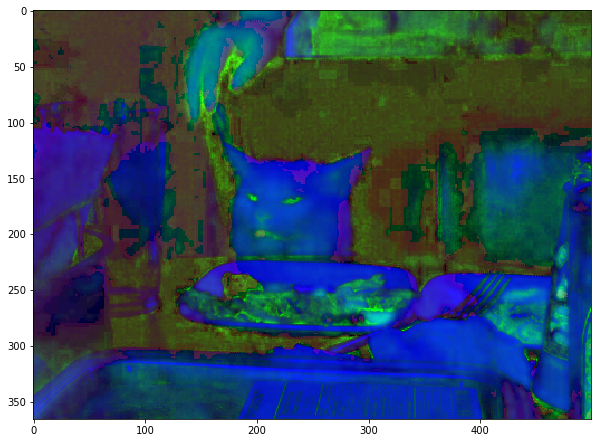

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(hsv_image)

In [13]:
new_rgb_image = skimage.color.hsv2rgb(hsv_image)

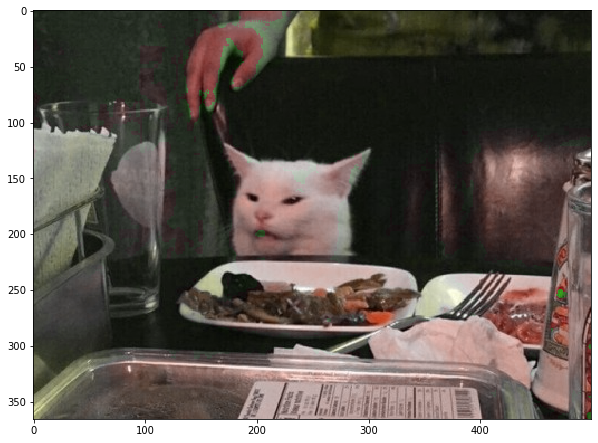

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(new_rgb_image)